# For Failed experiments

In [1]:
import csv
import sys
import os
import re
import numpy as np
import datetime

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import cm 
import seaborn as sns
import pandas as pd
from scipy.interpolate import griddata

% matplotlib inline

In [2]:
# save_file='analysis_out/'
# converged_data=save_file+'new_notconverged_details.txt'
save_file='data_pi3_out/'
converged_data=save_file+'notconverged_pi3_notnormalized.txt'

In [3]:
# Nifty trick
class Customdictionary(dict):
    def __setitem__(self,key,value):
        try:
            self[key]
        except KeyError:
            super(Customdictionary,self).__setitem__(key,[])
        self[key].append(value)

In [4]:
def remove_chars(string):
    chars="[^0123456789\.]"
    return re.sub(chars,"",string)

### Cluster Data Read

In [5]:
# Separating data based on sensor noise
converged_data_dict_00=Customdictionary()
converged_data_dict_05=Customdictionary()
converged_data_dict_10=Customdictionary()
converged_data_dict_20=Customdictionary()
converged_data_dict_25=Customdictionary()
converged_data_dict_30=Customdictionary()
converged_data_dict_40=Customdictionary()

with open(converged_data,'r') as f:
    for line in f:
        temp=line.split(',')
        
        data_val=int(temp[2].lstrip())
        key_raw=(temp[0]+temp[1]).split('_')
        arena_length=int(key_raw[1])
        arena_size=arena_length*arena_length
        n_robots=int(arena_size*float(key_raw[3]))
        n_defecting=int(n_robots*float(key_raw[5]))
        comm_range=int(key_raw[7])
        sensor_fault=float(key_raw[11])


        if sensor_fault==0.0:
#             key=(sensor_fault,float(key_raw[5])) # (SensorfaultFraction,DefectingRobotsFraction)
            key=float(key_raw[5]) 
            value=int(data_val) # Timestep
            converged_data_dict_00[key]=value
        elif sensor_fault==0.05:
#             key=(sensor_fault,float(key_raw[5])) # (SensorfaultFraction,DefectingRobotsFraction)
            key=float(key_raw[5])
            value=int(data_val) # Timestep
            converged_data_dict_05[key]=data_val
        elif sensor_fault==0.10:
#             key=(sensor_fault,float(key_raw[5])) # (SensorfaultFraction,DefectingRobotsFraction)
            key=float(key_raw[5])
            value=int(data_val) # Timestep
            converged_data_dict_10[key]=data_val
        elif sensor_fault==0.20:
#             key=(sensor_fault,float(key_raw[5])) # (SensorfaultFraction,DefectingRobotsFraction)
            key=float(key_raw[5])
            value=int(data_val) # Timestep
            converged_data_dict_20[key]=data_val
        elif sensor_fault==0.25:
#             key=(sensor_fault,float(key_raw[5])) # (SensorfaultFraction,DefectingRobotsFraction)
            key=float(key_raw[5])
            value=int(data_val) # Timestep
            converged_data_dict_25[key]=data_val
        elif sensor_fault==0.30:
#             key=(sensor_fault,float(key_raw[5])) # (SensorfaultFraction,DefectingRobotsFraction)
            key=float(key_raw[5])
            value=int(data_val) # Timestep
            converged_data_dict_30[key]=data_val
        elif sensor_fault==0.40:
#             key=(sensor_fault,float(key_raw[5])) # (SensorfaultFraction,DefectingRobotsFraction)
            key=float(key_raw[5])
            value=int(data_val) # Timestep
            converged_data_dict_40[key]=data_val

In [6]:
# Summaries
count_tstep_summary_dict_00=Customdictionary()
count_tstep_summary_dict_05=Customdictionary()
count_tstep_summary_dict_10=Customdictionary()
count_tstep_summary_dict_20=Customdictionary()
count_tstep_summary_dict_25=Customdictionary()
count_tstep_summary_dict_30=Customdictionary()
count_tstep_summary_dict_40=Customdictionary()

mean_tstep_summary_dict_00=Customdictionary()
mean_tstep_summary_dict_05=Customdictionary()
mean_tstep_summary_dict_10=Customdictionary()
mean_tstep_summary_dict_20=Customdictionary()
mean_tstep_summary_dict_25=Customdictionary()
mean_tstep_summary_dict_30=Customdictionary()
mean_tstep_summary_dict_40=Customdictionary()

for key, value in converged_data_dict_00.items():
    successful_experiments=len(value)
    mean_tstep=np.mean(value)
#     summary_dict_00[key]=successful_experiments,round(mean_tstep)
    count_tstep_summary_dict_00[key]=successful_experiments
    mean_tstep_summary_dict_00[key]=round(mean_tstep)
    
for key, value in converged_data_dict_05.items():
    successful_experiments=len(value)
    mean_tstep=np.mean(value)
#     summary_dict_05[key]=successful_experiments,round(mean_tstep)
    count_tstep_summary_dict_05[key]=successful_experiments
    mean_tstep_summary_dict_05[key]=round(mean_tstep)

for key, value in converged_data_dict_10.items():
    successful_experiments=len(value)
    mean_tstep=np.mean(value)
#     summary_dict_10[key]=successful_experiments,round(mean_tstep)
    count_tstep_summary_dict_10[key]=successful_experiments
    mean_tstep_summary_dict_10[key]=round(mean_tstep)

for key, value in converged_data_dict_20.items():
    successful_experiments=len(value)
    mean_tstep=np.mean(value)
#     summary_dict_20[key]=successful_experiments,round(mean_tstep)
    count_tstep_summary_dict_20[key]=successful_experiments
    mean_tstep_summary_dict_20[key]=round(mean_tstep)

for key, value in converged_data_dict_25.items():
    successful_experiments=len(value)
    mean_tstep=np.mean(value)
#     summary_dict_25[key]=successful_experiments,round(mean_tstep)
    count_tstep_summary_dict_25[key]=successful_experiments
    mean_tstep_summary_dict_25[key]=round(mean_tstep)

for key, value in converged_data_dict_30.items():
    successful_experiments=len(value)
    mean_tstep=np.mean(value)
#     summary_dict_30[key]=successful_experiments,round(mean_tstep)
    count_tstep_summary_dict_30[key]=successful_experiments
    mean_tstep_summary_dict_30[key]=round(mean_tstep)

for key, value in converged_data_dict_40.items():
    successful_experiments=len(value)
    mean_tstep=np.mean(value)
#     summary_dict_40[key]=successful_experiments,round(mean_tstep)
    count_tstep_summary_dict_40[key]=successful_experiments
    mean_tstep_summary_dict_40[key]=round(mean_tstep)

### Setup

In [7]:
# Need to create an array from the summary dictionaries. Shoddy code
index=['0.00']
ct_df1=pd.DataFrame(data=count_tstep_summary_dict_00,index=index)
index=['0.05']
ct_df2=pd.DataFrame(data=count_tstep_summary_dict_05,index=index)
index=['0.10']
ct_df3=pd.DataFrame(data=count_tstep_summary_dict_10,index=index)
index=['0.20']
ct_df4=pd.DataFrame(data=count_tstep_summary_dict_20,index=index)
index=['0.25']
ct_df5=pd.DataFrame(data=count_tstep_summary_dict_25,index=index)
index=['0.30']
ct_df6=pd.DataFrame(data=count_tstep_summary_dict_30,index=index)
index=['0.40']
ct_df7=pd.DataFrame(data=count_tstep_summary_dict_40,index=index)

ct_df_all=ct_df7.append(ct_df6).append(ct_df5).append(ct_df4).append(ct_df3).append(ct_df2).append(ct_df1)

In [8]:
ct_df_all

,0.05,0.1,0.125,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.75,0.8
0.40,72.0,121.0,141.0,164.0,185.0,204,219,244,264,268,272,281
0.30,25.0,43.0,53.0,64.0,88.0,112,126,152,181,193,214,218
0.25,12.0,23.0,32.0,38.0,59.0,78,85,106,127,151,163,166
0.20,6.0,15.0,17.0,23.0,36.0,51,59,79,95,111,110,121
0.10,1.0,6.0,8.0,10.0,16.0,24,31,50,58,64,61,57
0.05,NaN,2.0,4.0,8.0,9.0,14,21,31,43,48,50,47
0.00,NaN,NaN,NaN,NaN,NaN,2,3,6,8,9,10,12


In [9]:
# Need to create an array from the summary dictionaries. Shoddy code
index=['0.00']
mt_df1=pd.DataFrame(data=mean_tstep_summary_dict_00,index=index)
index=['0.05']
mt_df2=pd.DataFrame(data=mean_tstep_summary_dict_05,index=index)
index=['0.10']
mt_df3=pd.DataFrame(data=mean_tstep_summary_dict_10,index=index)
index=['0.20']
mt_df4=pd.DataFrame(data=mean_tstep_summary_dict_20,index=index)
index=['0.25']
mt_df5=pd.DataFrame(data=mean_tstep_summary_dict_25,index=index)
index=['0.30']
mt_df6=pd.DataFrame(data=mean_tstep_summary_dict_30,index=index)
index=['0.40']
mt_df7=pd.DataFrame(data=mean_tstep_summary_dict_40,index=index)

mt_df_all=mt_df7.append(mt_df6).append(mt_df5).append(mt_df4).append(mt_df3).append(mt_df2).append(mt_df1)

In [10]:
mt_df_all

,0.05,0.1,0.125,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.75,0.8
0.40,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
0.30,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
0.25,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
0.20,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
0.10,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
0.05,NaN,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
0.00,NaN,NaN,NaN,NaN,NaN,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0


plt.pcolor(df_all)
plt.yticks(np.arange(0.5, len(df_all.index), 1), df_all.index)
plt.xticks(np.arange(0.5, len(df_all.columns), 1), df_all.columns)
plt.show()

### Heatmaps

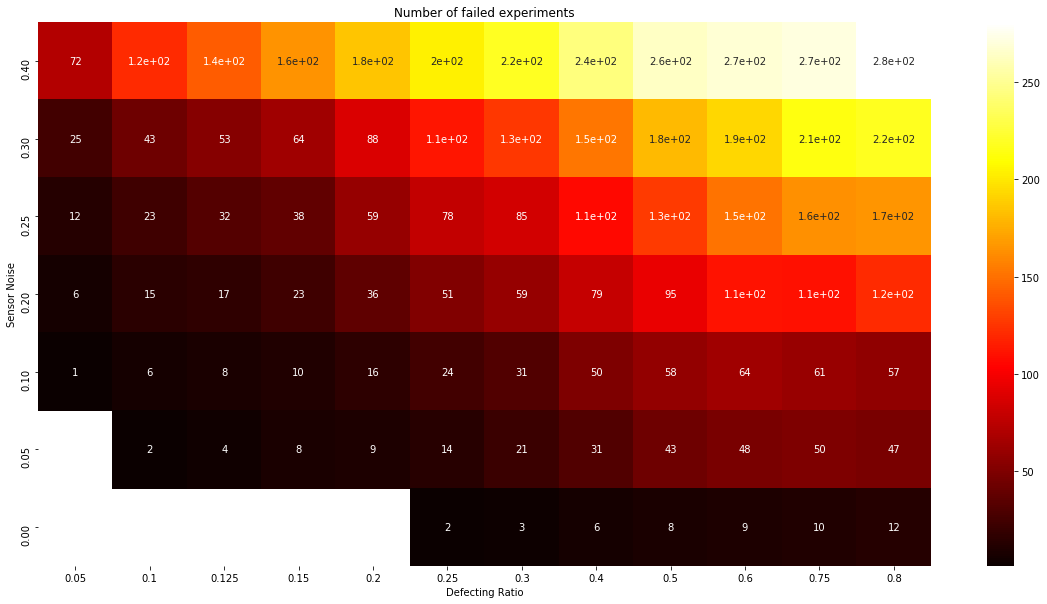

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(ct_df_all, annot=True,cmap='hot')
plt.ylabel('Sensor Noise')
plt.xlabel('Defecting Ratio')
plt.title('Number of failed experiments')
# plt.savefig("FailedExperiments_Random",bbox_inches='tight')
plt.savefig("FailedExperiments_Defecting",bbox_inches='tight')

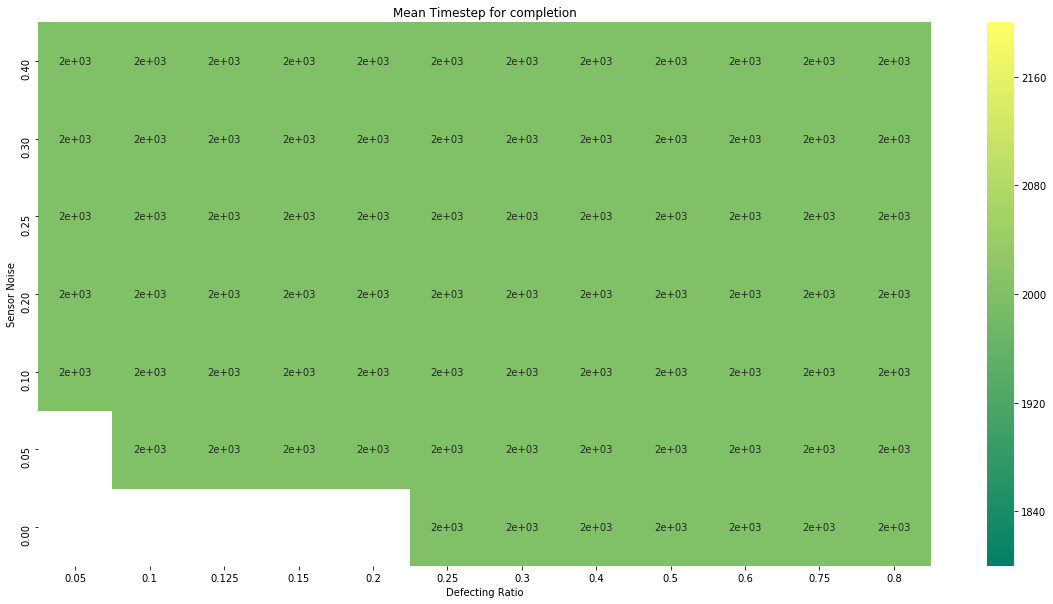

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(mt_df_all, annot=True,cmap='summer')
plt.ylabel('Sensor Noise')
plt.xlabel('Defecting Ratio')
plt.title('Mean Timestep for completion')
# plt.savefig("Failed_MeanTimesteps_Random",bbox_inches='tight')
plt.savefig("Failed_MeanTimesteps_Defecting",bbox_inches='tight')